# Advanced Leaspy Utilisation

This is already the last practical session of the day ! Becarefull you have only an __hour and half__.

### Objectives : 
- Understand data format that is needed to use leaspy,
- Learn to use parameters

# The set-up

As before, if you have followed the [installation details](https://gitlab.com/ArnaudVld/ai4health-2021-leaspy-workshop) carefully, you should 

- be running this notebook in the `leaspy_tutorial` conda environment (be sure that the kernel you are using is `leaspy_tutorial` => check `Kernel` above)
- having all the needed packages already install

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following command lines.

In [30]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy import stats
%matplotlib inline

from leaspy import Leaspy, IndividualParameters, AlgorithmSettings, Data

# Part I: The prediction

One of the main issue of Parkinson disease specialized doctor is that they do not know how fast will the disease evolved and then are unable to set the right spacing between two visits wih their patients. In addition, they would like to give advises to their patients for them to anticipate administrative obligations by the time they are still able to do them. The most important score to monitore is MDS3_off_total, but it is always nice to have a some others. 

Leaspy could be a great tool to help solving those issues. The following part contains the main structure to train and test a leaspy model.

### I.1. Prepare your data

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Two datasets, containing 200 patients, are available :
* __learn_leaspy2__ : contains historic data of patients visits,
* __pred_leaspy2__ : contains the next visit for each patient, that it would be nice to predict.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following command lines to load the data.__

In [3]:
data_path = os.path.join(os.getcwd(),'..','data/TP3_advanced_leaspy/')
df = pd.read_csv(data_path + "learn_leaspy2.csv")
df.set_index(['ID', 'TIME'], inplace=True)
df.head()

MDS1_total  MDS2_total  MDS3_off_total  SCOPA_total  \
ID     TIME                                                             
GS-001 62.289333         NaN    3.556297       -9.000000     0.000000   
       62.789333    4.644412    6.570468       15.658805     5.721043   
       63.289333    1.955755    2.621946       29.142870     0.000000   
       64.289330         NaN    0.000000       44.319816    44.560006   
       64.789330    4.169568    4.752366       29.652244     0.000000   

                  MOCA_total  PUTAMEN_R  PUTAMEN_L  CAUDATE_R  CAUDATE_L  \
ID     TIME                                                                
GS-001 62.289333   26.784926   0.168703   0.140237   0.069723   0.041532   
       62.789333   25.303684   0.146405   0.172067   0.034234   0.089805   
       63.289333   30.000000   0.163331   0.188258   0.069586   0.060110   
       64.289330   29.851244   0.185705   0.177019   0.053399   0.076220   
       64.789330   28.533121   0.194951   0.171595   0.048021   0.083921   

                  AGD_total  
ID     TIME                  
GS-001 62.289333   0.078704  
       62.789333   0.374873  
       63.289333   0.194420  
       64.289330   0.237782  
       64.789330   0.159916

In [4]:
df_vis = pd.read_csv(data_path + "pred_leaspy2.csv")
df_vis.set_index(['ID'], inplace=True)
df_vis.head()

TIME  MDS1_total  MDS2_total  MDS3_off_total  SCOPA_total  \
ID                                                                       
GS-001  69.089333    4.960370    5.635592       45.674665    13.727753   
GS-002  73.647736   14.674264    9.983259       48.461299     1.777607   
GS-003  62.491299         NaN    9.429927       -9.000000    27.019072   
GS-004  67.666000    7.170177    3.978171        7.608285     0.000000   
GS-005  74.125290         NaN    3.628875       -9.000000     3.493040   

        MOCA_total  PUTAMEN_R  PUTAMEN_L  CAUDATE_R  CAUDATE_L  AGD_total  
ID                                                                         
GS-001   27.915718   0.209688   0.229443   0.105179   0.137542   0.319582  
GS-002   19.778270   0.268539   0.211596   0.196772   0.193251   0.404642  
GS-003   24.602786   0.182493   0.151622   0.056601   0.096034   0.347589  
GS-004   27.879789   0.223414   0.185168   0.186051   0.182661   0.312880  
GS-005   28.498334   0.197911   0.189411   0.114025   0.122356   0.336951

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> You have the following informations about scores :
* __MDS1_total__ : increasing score from 0 to 52,
* __MDS2_total__ : increasing score from 0 to 52,
* __MDS3_off_total__ : increasing score from 0 to 132,
* __SCOPA_total__ : increasing score from 0 to 72,
* __MOCA_total__ : decreasing score from 30 to 0,
* __AGD_total__ : unknown positive score (will need to be explored),
* __Others__ : the rest are imaging increasing score and then have no border, except that they are suppose to be positive. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Plot histogram to check that the data are as expected.__

In [ ]:
# To complete

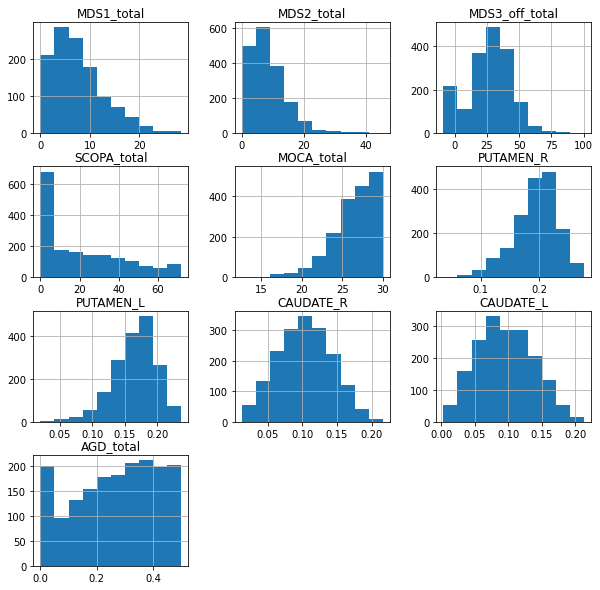

In [5]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.hist(figsize = (10,10))
plt.show()

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __What do we observe ? What do thoses unexpected data mean ?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Apply the right treatment to those unexpected data. Do note forget to apply it on ALL the data.__

In [ ]:
# To complete

In [14]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df = df.replace(-9,np.nan)
df_vis = df_vis.replace(-9,np.nan)

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Leaspy model is able to handle NaN, but it is always important to quantify them.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Return the number of NaN by feature.__

In [ ]:
# To complete

In [7]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df.isna().sum()

MDS1_total        596
MDS2_total          0
MDS3_off_total    196
SCOPA_total         0
MOCA_total          0
PUTAMEN_R           0
PUTAMEN_L           0
CAUDATE_R           0
CAUDATE_L           0
AGD_total           0
dtype: int64

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Leaspy model only takes normalised increasing with time data.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Using the function below, explore AGD_total to try to understand its progression.__

Note : Do not hesitate to compare it with other increasing or decreasing features.

In [8]:
def plot_individuals(df, feature,  sublist=None):
    plt.figure(figsize=(12, 6))
    
    if sublist is None:
        sublist = df.index.unique('ID')
        
    colors =  sns.color_palette(palette='icefire', n_colors=len(sublist), desat=None, as_cmap=False)
    
    for c, idx in zip(colors, sublist):
        indiv_df = df.loc[idx]
        
        ages = indiv_df.index.get_level_values(0)
        real_values = indiv_df[feature].values
        plt.plot(ages, real_values, c=c)
        plt.xlabel("Age in years")
        plt.ylabel(feature)
        plt.title("Evolution for each patient of " + feature)

In [33]:
# To complete

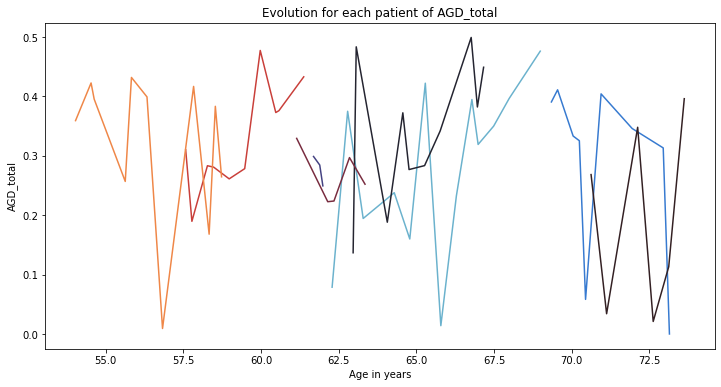

In [9]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

plot_individuals(df, "AGD_total", sublist = df.index.unique('ID')[:8])

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __What do you conclud about AGD_total progression? Should it be used for leasppy prediction?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Now that you know the progresison of all the peatures, can you normalized them all now? If not what is the issue and which features are concerned?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the code below to split the data into a training and testing set.__

In [15]:
##CREATE TRAINING AND TESTING SETS
patient_stop = 'GS-100'
patient_start = 'GS-101'

df_train = df.loc[:patient_stop].copy()
df_test = df.loc[patient_start:].copy()
df_to_pred = df_vis.loc[patient_start:].copy()

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Normalize the data using the function below and making sure that you have increasing data at the end.__

In [16]:
def normalize(df, feat, max_, min_, increase = True ):
    df_study = df[feat].copy()
    df_study = (df_study-min_)/(max_-min_)
    if not increase :
        df_study = 1 - df_study
    return df_study

In [17]:
# To complete

In [18]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

#MDS1_total 
df_train.loc[:,"MDS1_total"] = normalize(df_train, "MDS1_total", 52, 0, increase = True )
df_test.loc[:,"MDS1_total"] = normalize(df_test, "MDS1_total", 52, 0, increase = True )
df_to_pred.loc[:,"MDS1_total"] = normalize(df_to_pred, "MDS1_total", 52, 0, increase = True )

#MDS2_total
df_train.loc[:,"MDS2_total"] = normalize(df_train, "MDS2_total", 52, 0, increase = True )
df_test.loc[:,"MDS2_total"] = normalize(df_test, "MDS2_total", 52, 0, increase = True )
df_to_pred.loc[:,"MDS2_total"] = normalize(df_to_pred, "MDS2_total", 52, 0, increase = True )

#MDS3_total
df_train.loc[:,"MDS3_off_total"] = normalize(df_train, "MDS3_off_total", 132, 0, increase = True )
df_test.loc[:,"MDS3_off_total"] = normalize(df_test, "MDS3_off_total", 132, 0, increase = True )
df_to_pred.loc[:,"MDS3_off_total"] = normalize(df_to_pred, "MDS3_off_total", 132, 0, increase = True )

#SCOPA_TOTAL
df_train.loc[:,"SCOPA_total"] = normalize(df_train, "SCOPA_total", 72, 0, increase = True )
df_test.loc[:,"SCOPA_total"] = normalize(df_test, "SCOPA_total", 72, 0, increase = True )
df_to_pred.loc[:,"SCOPA_total"] = normalize(df_to_pred, "SCOPA_total", 72, 0, increase = True )

#MOCA_total
df_train.loc[:,"MOCA_total"] = normalize(df_train, "MOCA_total", 30, 0, increase = False )
df_test.loc[:,"MOCA_total"] = normalize(df_test, "MOCA_total", 30, 0, increase = False )
df_to_pred.loc[:,"MOCA_total"] = normalize(df_to_pred, "MOCA_total", 30, 0, increase = False )

#AGD_total
#No need we will not use it...

#PUTAMEN_R
df_test.loc[:,"PUTAMEN_R"] = normalize(df_test, "PUTAMEN_R", df_train["PUTAMEN_R"].max(), 
                    df_train["PUTAMEN_R"].min(), increase = True )
df_to_pred.loc[:,"PUTAMEN_R"] = normalize(df_to_pred, "PUTAMEN_R", df_train["PUTAMEN_R"].max(), 
                    df_train["PUTAMEN_R"].min(), increase = True )
df_train.loc[:,"PUTAMEN_R"] = normalize(df_train, "PUTAMEN_R", df_train["PUTAMEN_R"].max(), 
                    df_train["PUTAMEN_R"].min(), increase = True )

#PUTAMEN_L
df_test.loc[:,"PUTAMEN_L"] = normalize(df_test, "PUTAMEN_L", df_train["PUTAMEN_L"].max(), 
                    df_train["PUTAMEN_L"].min(), increase = True )
df_to_pred.loc[:,"PUTAMEN_L"] = normalize(df_to_pred, "PUTAMEN_L", df_train["PUTAMEN_L"].max(), 
                    df_train["PUTAMEN_L"].min(), increase = True )
df_train.loc[:,"PUTAMEN_L"] = normalize(df_train, "PUTAMEN_L", df_train["PUTAMEN_L"].max(), 
                    df_train["PUTAMEN_L"].min(), increase = True )

#CAUDATE_R
df_test.loc[:,"CAUDATE_R"] = normalize(df_test, "CAUDATE_R", df_train["CAUDATE_R"].max(), 
                    df_train["CAUDATE_R"].min(), increase = True )
df_to_pred.loc[:,"CAUDATE_R"] = normalize(df_to_pred, "CAUDATE_R", df_train["CAUDATE_R"].max(), 
                    df_train["CAUDATE_R"].min(), increase = True )
df_train.loc[:,"CAUDATE_R"] = normalize(df_train, "CAUDATE_R", df_train["CAUDATE_R"].max(), 
                    df_train["CAUDATE_R"].min(), increase = True )

#CAUDATE_L
df_test.loc[:,"CAUDATE_L"] = normalize(df_test, "CAUDATE_L", df_train["CAUDATE_L"].max(), 
                    df_train["CAUDATE_L"].min(), increase = True )
df_to_pred.loc[:,"CAUDATE_L"] = normalize(df_to_pred, "CAUDATE_L", df_train["CAUDATE_L"].max(), 
                    df_train["CAUDATE_L"].min(), increase = True )
df_train.loc[:,"CAUDATE_L"] = normalize(df_train, "CAUDATE_L", df_train["CAUDATE_L"].max(), 
                    df_train["CAUDATE_L"].min(), increase = True )

### I.2. Train your model

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Becarefull you have only an __hour and half__ and running a leaspy model on ten features can take a lot of time... We advise you to start by univariate model ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Complete the code below to select the columns you want to use to train your leaspy model.__

In [82]:
# To complete

col = #####################################

data_train = Data.from_dataframe(df_train[col]) 
data_test = Data.from_dataframe(df_test[col])
df_to_pred = df_to_pred

In [20]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

col = ["MDS3_off_total", "MDS2_total"]

data_train = Data.from_dataframe(df_train[col]) 
data_test = Data.from_dataframe(df_test[col])
df_to_pred = df_to_pred

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Complete the code below to set the parameters you want for your model.__

In [6]:
# To complete

leaspy_model = ###############
nb_source = ###############
algo_settings = #################

##FIT
leaspy = Leaspy(leaspy_model)
leaspy.model.load_hyperparameters({'source_dimension': nb_source})
leaspy.fit(data_train, algorithm_settings=algo_settings)

|##################################################|   300/300 iterations
The standard deviation of the noise at the end of the calibration is:
22.8847

Calibration took: 5s


In [21]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

leaspy_model = "logistic" #'univariate'
nb_source = 1
algo_settings = AlgorithmSettings('mcmc_saem', 
                                  n_iter=3000,           # n_iter defines the number of iterations
                                  progress_bar=True)     # To display a nice progression bar during calibration

##FIT
leaspy = Leaspy(leaspy_model)
leaspy.model.load_hyperparameters({'source_dimension': nb_source})
leaspy.fit(data_train, algorithm_settings=algo_settings)

|##################################################|   3000/3000 iterations
The standard deviation of the noise at the end of the calibration is:
0.0582

Calibration took: 31s


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Evaluate that your model learned well.__

In [7]:
# To complete

In [ ]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

#ONLY NEED TO CHECK THE LOG ??

### I.3. Test your model

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Complete the code below to make the predictions.__

In [8]:
# To complete

##SET PARAMETERS
settings_personalization = #################

##PREDICTIONS
ip = #################
reconstruction = #################
d2 = {k: v[0] for k, v in reconstruction.items()}
df_pred = pd.DataFrame.from_dict(d2, orient='index', columns = [s+"_model1" for s in col])

|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
23.5885

Personalization scipy_minimize took: 5s


In [24]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

##SET PARAMETERS
settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True)

##PREDICTIONS
ip = leaspy.personalize(data_test, settings_personalization)
reconstruction = leaspy.estimate(dict(zip(df_to_pred.index,df_to_pred['TIME'])), ip)
d2 = {k: v[0] for k, v in reconstruction.items()}
df_pred = pd.DataFrame.from_dict(d2, orient='index', columns = [s+"_model1" for s in col])

|##################################################|   100/100 subjects
The standard deviation of the noise at the end of the personalization is:
0.0569

Personalization scipy_minimize took: 13s


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Display results of your prediction against real values.__

In [ ]:
# To complete

Mean absolute error MDS3_off_total : 0.05990221973727731


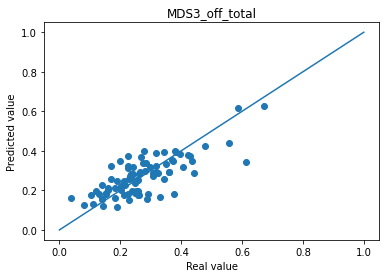

Mean absolute error MDS2_total : 0.053213369101285934


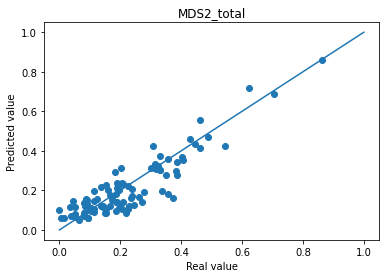

In [26]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

for s in col :
    print("Mean absolute error "+s+" : " + str(np.abs(df_to_pred[s]-df_pred[s+'_model1']).mean()))
    plt.scatter(df_to_pred[s], df_pred[s+'_model1'])
    plt.plot([0,1],[0,1])
    plt.title(s)
    plt.xlabel("Real value")
    plt.ylabel("Predicted value")
    plt.show()

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Note that an average good error is about 5% of absolute error for MDS3_off_total.

# Part II: The cofactor evaluation

Besides prediction, the individual parameters are interesting in the sense that they provide meaningful and interesting insights about the disease progression. For that reasons, these individual parameters can be correlated to other cofactors. Let's consider that you have a covariate Cofactor 1 that encodes a genetic status: 1 if a specific mutation is present, 0 otherwise. Now, let's see if this mutation has an effect on the disease progression. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Complete the code below to see the repartition of carriers and non carriers.__

In [ ]:
# To complete

# —— Convert individual parameters to dataframe
df_ip = ###############

# —— Merge with cofactors
cofactor = pd.read_csv(data_path + "cof_leaspy2.csv", index_col=['ID'])
df_ip = df_ip.join(cofactor)

# —— Separate the individual parameters with respect to the cofactor
carriers = ###############
non_carriers = ###############

# —— Plot the time shifts in carriers and non-carriers
plt.title('Time shift histogram')
plt.hist(carriers['tau'], density=True, label='Carriers')
plt.hist(non_carriers['tau'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()


# —— Plot the acceleration factor in carriers and non-carriers
plt.title('Log-Acceleration factor histogram')
plt.hist(carriers['xi'], density=True, label='Carriers')
plt.hist(non_carriers['xi'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()

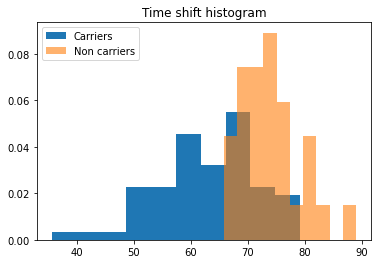

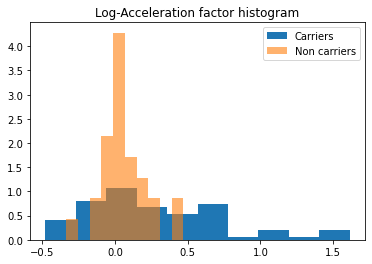

In [27]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

# —— Convert individual parameters to dataframe
df_ip = ip.to_dataframe()

# —— Merge with cofactors
cofactor = pd.read_csv(data_path + "cof_leaspy2.csv", index_col=['ID'])
df_ip = df_ip.join(cofactor)

# —— Separate the individual parameters with respect to the cofactor
carriers = df_ip[df_ip['MUTATION'] == 0.]
non_carriers = df_ip[df_ip['MUTATION'] == 1.]

# —— Plot the time shifts in carriers and non-carriers
plt.title('Time shift histogram')
plt.hist(carriers['tau'], density=True, label='Carriers')
plt.hist(non_carriers['tau'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()


# —— Plot the acceleration factor in carriers and non-carriers
plt.title('Log-Acceleration factor histogram')
plt.hist(carriers['xi'], density=True, label='Carriers')
plt.hist(non_carriers['xi'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Make a statistic tests using `stats.ttest_ind` and `stats.mannwhitneyu`.__

In [28]:
# To complete

In [31]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

# —— Student t-test (under the asumption of a gaussian distribution only)
print(stats.ttest_ind(carriers['tau'], non_carriers['tau']))
print(stats.ttest_ind(carriers['xi'], non_carriers['xi']))

# —— Mann-withney t-test
print(stats.mannwhitneyu(carriers['tau'], non_carriers['tau']))
print(stats.mannwhitneyu(carriers['xi'], non_carriers['xi']))

Ttest_indResult(statistic=-6.337125890356382, pvalue=7.160768180585477e-09)
Ttest_indResult(statistic=2.4555508475264656, pvalue=0.01582805042111093)
MannwhitneyuResult(statistic=279.0, pvalue=6.088820445701606e-09)
MannwhitneyuResult(statistic=733.0, pvalue=0.012272066588235363)
